# EUR-USD and EUR-RUB Exchange Rate Evolution in 2020 (the COVID Pandemic)

<img src="https://cdn.pixabay.com/photo/2018/04/24/13/34/golden-3346988__340.jpg"/>

## Introduction

The goal of this project is to explore the evolution of the exchange rates between the following currencies:

- EUR-USD
- EUR-RUB (the Russian Rouble)

For each pair of currencies, we'll identify the main political and/or economical factors that influenced exchange rate dynamics during the coronavirus pandemic in 2020.

The [dataset](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) we'll use describes the euro daily exchange rates for different currencies from 1999 till 2021. The data was gathered by Daria Chemkaeva from the European Central Bank data source.

### Summary of Results

We found out that while in the USA the COVID trends had a significant impact on the EUR-USD exchange rate resulting in its rapid and almost constant growth till the end of the year, in Russia the main factors that influenced the EUR-RUB exchange rate up to reaching its historical maximum were dramatic Urals oil price fluctuations and the international scandal related to the poisoning of Alexei Navalny.

## Loading Data and Initial Exploration

Let's start by importing the required libraries and loading the dataset for exploration.

In [1]:
import warnings
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

# Enables Jupyter to display graphs
%matplotlib inline
# Ignore warnings
warnings.filterwarnings('ignore')
# Display all columns
pd.set_option('display.max_columns', None)

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

The dataset has been loaded. Next we'll inspect the first and last five rows to understand the structure of the dataset, also, we'll look at some basic facts about the dataset using `DataFrame.info()`.

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,NaN,0.90128,NaN,9.4982,7.5690,359.62,17247.33,3.8981,89.7975,155.5,127.26,1337.90,NaN,NaN,NaN,24.4718,4.9359,10.2863,1.6883,58.947,4.5113,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,NaN,0.90190,NaN,9.5176,7.5660,357.79,17259.99,3.9027,90.0455,155.3,127.13,1342.29,NaN,NaN,NaN,24.2552,4.9570,10.3435,1.6907,59.043,4.4998,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,NaN,0.90635,NaN,9.5659,7.5595,357.86,17168.20,3.9289,90.2040,156.3,127.03,1339.30,NaN,NaN,NaN,24.3543,4.9482,10.3810,1.6916,59.296,4.5160,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,NaN,0.90333,NaN,9.5136,7.5588,360.27,17075.10,3.9277,89.8670,156.1,126.25,1335.85,NaN,NaN,NaN,24.5860,4.9293,10.4713,1.7036,59.020,4.5473,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,NaN,0.90160,NaN,9.5330,7.5565,361.32,17062.67,3.9430,89.7890,156.1,126.62,1332.03,NaN,NaN,NaN,24.3031,4.9264,10.4440,1.7065,59.058,4.5475,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

We find some interesting insights about the dataset which we'll talk about in our observation but before that let's calculate the percentage of missing values in each column:

In [6]:
print(f'\033[1mMISSING DATA:\033[0m\n{round(exchange_rates.isnull().sum() * 100/len(exchange_rates))}')

MISSING DATA:
Period\Unit:                 0.0
[Australian dollar ]         0.0
[Bulgarian lev ]             7.0
[Brazilian real ]            5.0
[Canadian dollar ]           0.0
[Swiss franc ]               0.0
[Chinese yuan renminbi ]     5.0
[Cypriot pound ]            59.0
[Czech koruna ]              0.0
[Danish krone ]              0.0
[Estonian kroon ]           45.0
[UK pound sterling ]         0.0
[Greek drachma ]            91.0
[Hong Kong dollar ]          0.0
[Croatian kuna ]             5.0
[Hungarian forint ]          0.0
[Indonesian rupiah ]         0.0
[Israeli shekel ]            5.0
[Indian rupee ]              5.0
[Iceland krona ]            42.0
[Japanese yen ]              0.0
[Korean won ]                0.0
[Lithuanian litas ]         27.0
[Latvian lats ]             31.0
[Maltese lira ]             59.0
[Mexican peso ]              0.0
[Malaysian ringgit ]         0.0
[Norwegian krone ]           0.0
[New Zealand dollar ]        0.0
[Philippine peso ]           

At this point, we can make following obervations:
- There are 5,699 rows and 41 columns in the dataset. Each entry represents a working day from `1999-01-04` till `2021-01-08` inclusive. Each column, apart from the first one, represents a currency to euro rate, for 40 different currencies.
- Many columns don't have missing values at all, while some have a high percentage of them: 91% for Greek drachma, 63% for Slovenian tolar.
- 3 of 41 columns are of float type, all the other columns are of object type. We should consider converting the first column with the dates into datetime and the others, representing numerical information, into float.

## Data Cleaning

For the sconpe of our analysis, we're interested only in the columns `Period\Unit:`, `[US dollar ]`, and `[Russian rouble ]`. Hence, we'll  focus on cleaning only them.

In [7]:
# Rename the columns
# Note: To avoid error we have to produce a raw string of column 'Period\Unit'
exchange_rates.rename(columns={r'Period\Unit:': 'Time',
                               '[US dollar ]': 'US_dollar',
                               '[Russian rouble ]': 'Russian_rouble'}, inplace=True)

# Convert 'Time' column to a datetime datatype
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# Sort the values by 'Time' in ascending order
exchange_rates.sort_values('Time', inplace=True)

# Reset the index (and drop the initial index)
exchange_rates.reset_index(drop=True, inplace=True)

In [8]:
# Isolate the necessary columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_rouble = exchange_rates[['Time', 'Russian_rouble']]

# Check the frequency table of EUR-USD and EUR-RUB
freq_eur_usd = euro_to_dollar['US_dollar'].value_counts()
freq_eur_rub = euro_to_rouble['Russian_rouble'].value_counts()

print(f'Frequency table of EUR-USD:\n{freq_eur_usd}')
print()
print(f'Frequency table of EUR-RUB:\n{freq_eur_rub}')

Frequency table of EUR-USD:
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64

Frequency table of EUR-RUB:
-          62
40.6500     4
39.6750     4
35.2250     4
40.5950     4
           ..
33.9845     1
34.1550     1
34.0890     1
34.0440     1
90.8000     1
Name: Russian_rouble, Length: 5413, dtype: int64


In both DataFrames, we have a wrong value `-` for the corresponding exchange rates, which resulted in these columns to be a string data type. Practically, those are missing values that should be dropped or dealt accordingly. In our case, we're going to drop rows where the `-` character appears.

In [9]:
# Keeping only the valid values in both DataFrames
euro_to_dollar = euro_to_dollar[~euro_to_dollar['US_dollar'].str.contains('-')]
euro_to_rouble = euro_to_rouble[~euro_to_rouble['Russian_rouble'].str.contains('-')]

# Convert 'US_dollar' and 'Russian_rouble' datatype into float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_rouble['Russian_rouble'] = euro_to_rouble['Russian_rouble'].astype(float)

Now that we created and cleaned the DataFrames for both currencies in interest, let's focus on each of them at turns.

## EUR-USD Exchange Rate Evolution

### General trend

Let's start with creating a line plot to visualize the evolution of the EUR-USD exchange rate for the whole period of time. Since we are interested in a general trend of this evolution, we'd rather see a smooth line for long-term upward and downward changes, without small wiggles due to the daily variation in the exchange rate. For these purposes, we can use the concept of **rolling mean** (or [moving average](https://en.wikipedia.org/wiki/Moving_average)). The principle behind this is that if we apply a larger rolling window, we'll get a smoother line, with reduced noise.

In our case, a reasonable rolling window is 30 days (i.e. 1 month). This approach will alow increasing the data-ink ratio without losing any important information, and as a result, will facilitate focusing on long-term trends rather than the noise.

In [10]:
# Create a column with smoothed values of EUR-USD exchange rates
euro_to_dollar['rolling_mean_30'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean_30
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


Now, we'll plot 2 graphs to see the difference:
1. EUR-USD exchange rate evolution without rolling mean
2. EUR-USD exchange rate evolution with rolling mean

In [11]:
def create_line_plot(df, target_col, xlabel, title, title_font=20, label_font=14,
                     x_min='1999-01-01', x_max='2021-01-08', y_min=None, y_max=None):
    '''
        Creates line plot to visualize currencies trends.
        
        Params:
            df (dataframe): dataframe of interest
            target_col (str): currency column (with or without rolling mean)
            xlabel (str): label on the x-axis
            title (str): graph title
            title_font (int): title font size (default: 20)
            label_font (int): label font size (default: 14)
            x_min (str): minimum x-axis limit (default: '1999-01-01')
            x_max (str): maximum x-axis limit (default: '2021-01-08')
            y_min (int): minimum x-axis limit (default: None)
            y_max (int): maximum x-axis limit (default: None)
            
        Returns: Line plot with given arguments.
    '''
    plt.plot(df['Time'], df[target_col], color='slateblue')
    plt.title(title, fontsize=title_font)
    plt.xlabel(xlabel, fontsize=label_font)
    plt.ylabel('Exchange rate', fontsize=label_font)
    # convert x_min and x_max from string to datetime format
    plt.xlim([pd.to_datetime(x_min),
              pd.to_datetime(x_max)])
    plt.ylim([y_min, y_max])
    sns.despine()

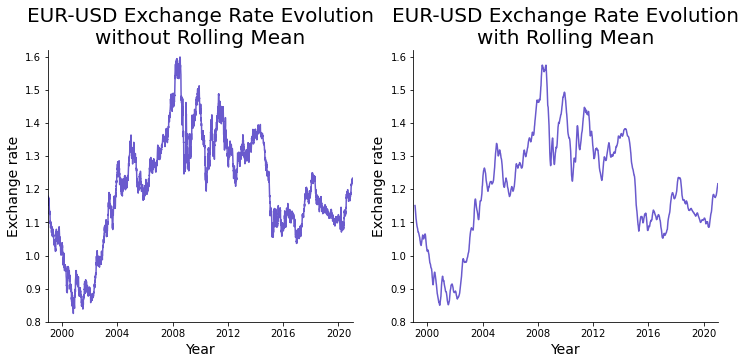

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
create_line_plot(df=euro_to_dollar, target_col='US_dollar', xlabel='Year',
                 title='EUR-USD Exchange Rate Evolution\nwithout Rolling Mean',
                 y_min=0.8, y_max=1.62)

plt.subplot(1,2,2)
create_line_plot(df=euro_to_dollar, target_col='rolling_mean_30', xlabel='Year',
                 title='EUR-USD Exchange Rate Evolution\nwith Rolling Mean',
                 y_min=0.8, y_max=1.62)

plt.show()

As we expected, the second graph is much easier to interpret. We can distinguish various features on it. Initial decrease lasted up until 2003 and followed by a rapid increase. After a series of going up and down, we observe a clear sharp drop at the end of 2015, followed by some fluctuations at lower levels.

Obviously, over the last 22 years, a lot of events happened in the USA both at national and international scales that influenced the EUR-USD exchange rate variation. The graph above can tell us numerous stories, but the one we want to visualize and explore in this project is **how the EUR-USD rate has changed during the coronavirus pandemic**.

### Developing the Storytelling Idea

Let's start with reproducing the graph above, for now without any particular adjustments, zooming in only the period of interest (`2019-12-01` to `2021-01-01`) and limiting the y-axis to discern the changes in more detail.

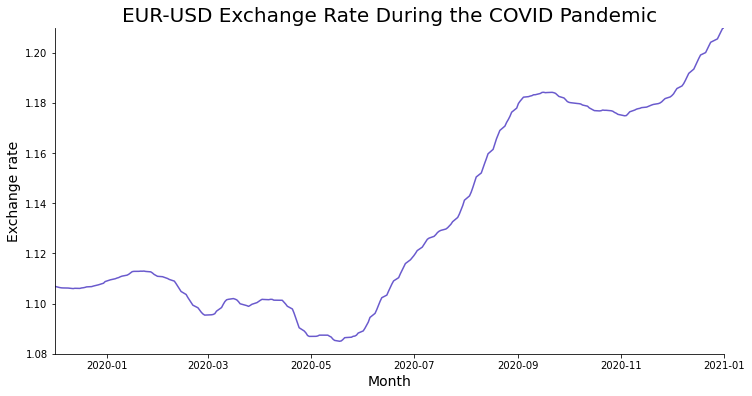

In [14]:
plt.figure(figsize=(12,6))
create_line_plot(df=euro_to_dollar, target_col='rolling_mean_30', xlabel='Month',
                 title='EUR-USD Exchange Rate During the COVID Pandemic',
                 x_min='2019-12-01', x_max='2021-01-01', y_min=1.08, y_max=1.21)

plt.show()

In 2020, after some fluctuations, the EUR-USD rate was steadily increasing from the end of May, with a slight decrease and plateau at the end of September to beginning of November.

Now, let's display the graph of daily new COVID cases in the USA in 2020, taken from [Our world in data](https://ourworldindata.org/coronavirus/country/italy?country=~USA):

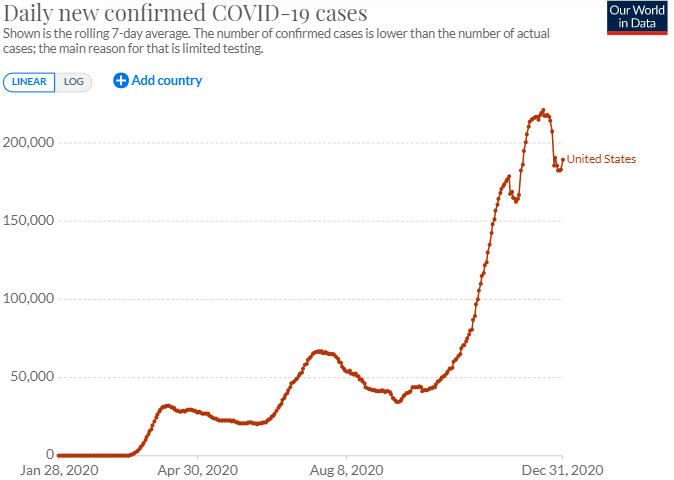

We can visually dissect this graph into several parts:
- The initial period of COVID
- First COVID wave
- First plateau
- Second COVID wave
- Second plateau
- Thrid COVID wave

After taking the approximate dates from [Our world in data](https://ourworldindata.org/coronavirus/country/italy?country=~USA) and some googling, we can say more about each period:
- **Initial period**: `01-13` to `03-17`, the [virus arrival in the country](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_the_United_States) till the first serious outbreak happened.
- **First wave**: `03-18` to `05-13`. The COVID issue in the USA rapidly became grave.
- **First plateau**: `05-14` to `06-17`. The situation was relatively stabilized, even though at a high average daily case number.
- **Second wave**: `06-18` to `08-21`. The second wave reached a much higher magnitude of daily cases, with a peak twice higher than that of the first wave.
- **Second plateau**: `08-22` to `10-10`. The situation was stabilized again, but at a much higher average daily case number than the pervious plateau.
- **Third wave**: `10-11` to `end of year 2020`. In reality, this wave contiued with some fluctuations also in 2021 and then later was followed by the fourth one. However, we are restricting our analysis upto the third wave only. The magnitude of the third wavs was upto 4 times higher than that of the 2nd one, reaching more than 221M cases/day.

Two landmarks should be mentioned here:

- The **presidential elections** (2020-11-03) with subsequent disorders were something not related directly to the COVID situation. However, keeping in mind our main goal is to trace the EUR-USD rate evolution in the USA in 2020, it was an important event for the country in general and had an impact on the exchange rate.
- The [mass vaccination](https://en.wikipedia.org/wiki/COVID-19_vaccination_in_the_United_States) was announced at the `end of December-beginning of January 2021`, and daily cases started steadily decreasing after that. Unfortunately, we can't see this period on our exchange rate graph, since the data is upto `2021-01-08`, so we can't trace the effect of the vaccination program and the consequent daily cases decrease on the EUR-USD rate evolution.

### Coding the Graph

Now, let's try to figure out if the COVID trends (and the presidential elections) correlate with the national currency evolution in 2020. Deciding on how to better represent our storytelling through data visualization, we should keep in mind the following things:

- A line plot seems to be a good choice here since it's familiar to a wide audience and works best when displaying time series.
- On the plot, we can show 6 COVID-related periods (excluding the vaccination start) and their corresponding rate trends as separate subplots and then combine them all in a bigger subplot.
- The presidential elections are not related to the COVID situation. Besides, this event was more pointed than lasting, including the disorders. Hence, we'd better show it on the subplot related to the third wave of COVID as an annotated point.
- Our visualization should maximize the data-ink ratio and be easily perceptible and interpretable for the audience.

Before moving on to the visualization part, we need to extract data for the year `2020`. Let's do that first in the code cell below:

In [33]:
# Extract data from 'euro_to_dollar' of year 2020
year_2020_usa = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year==2020)]
# Extract data from begining to covid (Jan 13th) till the end of year
covid_2020_usa = (year_2020_usa.copy()[(year_2020_usa['Time'].dt.month == 1) & (year_2020_usa['Time'].dt.day >= 13)
                      | (year_2020_usa['Time'].dt.month > 1)])

# Create a Dataframe for each covid phase in the usa in 2020
beginning_usa = covid_2020_usa.copy()[(covid_2020_usa['Time'] >= '2020-01-13') & (covid_2020_usa['Time'] <= '2020-03-17')]
wave_1_usa = covid_2020_usa.copy()[(covid_2020_usa['Time'] >= '2020-03-18') & (covid_2020_usa['Time'] <= '2020-05-13')]
plateau_1_usa = covid_2020_usa.copy()[(covid_2020_usa['Time'] >= '2020-05-14') & (covid_2020_usa['Time'] <= '2020-06-17')]
wave_2_usa = covid_2020_usa.copy()[(covid_2020_usa['Time'] >= '2020-06-18') & (covid_2020_usa['Time'] <= '2020-08-21')]
plateau_2_usa = covid_2020_usa.copy()[(covid_2020_usa['Time'] >= '2020-08-22') & (covid_2020_usa['Time'] <= '2020-10-10')]
wave_3_usa = covid_2020_usa.copy()[(covid_2020_usa['Time'] >= '2020-10-11')]

Next, we'll create a storytelling data visualization for the EUR-USD rate evolution during the COVID pandemic in the USA in year 2020.

In [53]:
euro_to_dollar.head()

,Time,US_dollar,rolling_mean_30
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN


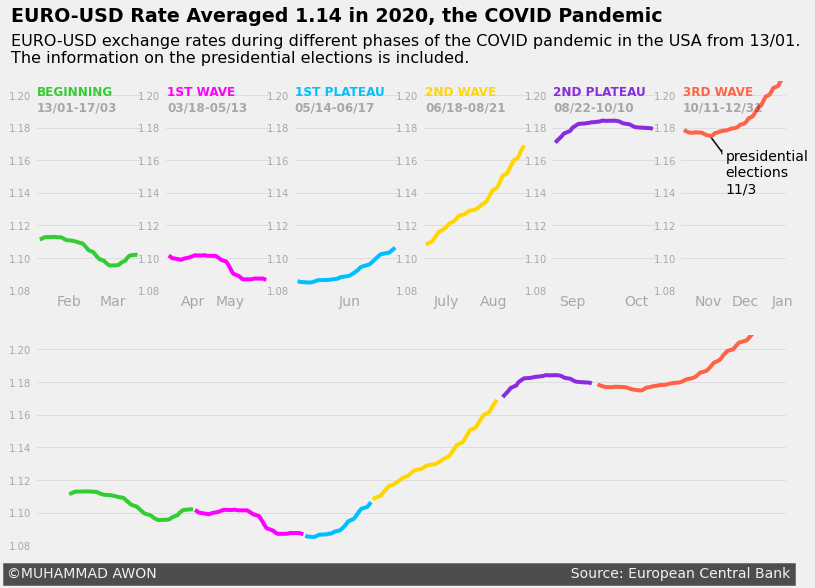

In [87]:
style.use('fivethirtyeight')

plt.figure(figsize=(12,8))
ax1 = plt.subplot(2,6,1)
ax2 = plt.subplot(2,6,2)
ax3 = plt.subplot(2,6,3)
ax4 = plt.subplot(2,6,4)
ax5 = plt.subplot(2,6,5)
ax6 = plt.subplot(2,6,6)
ax7 = plt.subplot(2,1,2)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
for ax in axes:
    ax.set_ylim(1.08, 1.21)
    ax.set_yticks([1.08, 1.10, 1.12, 1.14, 1.16, 1.18, 1.20])
    ax.set_yticklabels(['1.08', '1.10', '1.12', '1.14', '1.16', '1.18', '1.20'],
                       alpha=0.3, fontsize=10)
    ax.yaxis.grid(True, alpha=0.5)
    ax.xaxis.grid(False)
    
ax1.plot(beginning_usa['Time'], beginning_usa['rolling_mean_30'], color='limegreen')
ax1.set_xticklabels(['', '', 'Feb', '', '', '', 'Mar', '', ''], alpha=0.3)
ax1.text(18272, 1.2, 'BEGINNING', fontsize=12, fontweight='bold', color='limegreen')
ax1.text(18272, 1.19, '13/01-17/03', fontsize=12, fontweight='bold', alpha=0.3)

ax2.plot(wave_1_usa['Time'], wave_1_usa['rolling_mean_30'], color='magenta')
ax2.set_xticklabels(['', 'Apr', '', '', 'May', '', ''], alpha=0.3)
ax2.text(18338, 1.2, '1ST WAVE', fontsize=12, fontweight='bold', color='magenta')
ax2.text(18338, 1.19, '03/18-05/13', fontsize=12, fontweight='bold', alpha=0.3)

ax3.plot(plateau_1_usa['Time'], plateau_1_usa['rolling_mean_30'], color='deepskyblue')
ax3.set_xticklabels(['', '', '', '', '', 'Jun', '', '', '', ''], alpha=0.3)
ax3.text(18395, 1.2, '1ST PLATEAU', fontsize=12, fontweight='bold', color='deepskyblue')
ax3.text(18395, 1.19, '05/14-06/17', fontsize=12, fontweight='bold', alpha=0.3)

ax4.plot(wave_2_usa['Time'], wave_2_usa['rolling_mean_30'], color='gold')
ax4.set_xticklabels(['', '', 'July', '', '', '', 'Aug', '', '', ''], alpha=0.3)
ax4.text(18430, 1.2, '2ND WAVE', fontsize=12, fontweight='bold', color='gold')
ax4.text(18430, 1.19, '06/18-08/21', fontsize=12, fontweight='bold', alpha=0.3)

ax5.plot(plateau_2_usa['Time'], plateau_2_usa['rolling_mean_30'], color='blueviolet')
ax5.set_xticklabels(['', 'Sep', '', '', '', 'Oct', ''], alpha=0.3)
ax5.text(18497, 1.2, '2ND PLATEAU', fontsize=12, fontweight='bold', color='blueviolet')
ax5.text(18497, 1.19, '08/22-10/10', fontsize=12, fontweight='bold', alpha=0.3)

ax6.plot(wave_3_usa['Time'], wave_3_usa['rolling_mean_30'], color='tomato')
ax6.set_xticklabels(['', 'Nov', '', 'Dec', '', 'Jan'], alpha=0.3)
ax6.text(18546, 1.2, '3RD WAVE', fontsize=12, fontweight='bold', color='tomato')
ax6.text(18546, 1.19, '10/11-12/31', fontsize=12, fontweight='bold', alpha=0.3)
ax6.arrow(18568, 1.175, 10, -0.01, color='black')
ax6.annotate('presidential\nelections\n11/3', xy=(18581, 1.14))

ax7.plot(beginning_usa['Time'], beginning_usa['rolling_mean_30'], color='limegreen')
ax7.plot(wave_1_usa['Time'], wave_1_usa['rolling_mean_30'], color='magenta')
ax7.plot(plateau_1_usa['Time'], plateau_1_usa['rolling_mean_30'], color='deepskyblue')
ax7.plot(wave_2_usa['Time'], wave_2_usa['rolling_mean_30'], color='gold')
ax7.plot(plateau_2_usa['Time'], plateau_2_usa['rolling_mean_30'], color='blueviolet')
ax7.plot(wave_3_usa['Time'], wave_3_usa['rolling_mean_30'], color='tomato')
ax7.set_xticks([])

rate_avg = round(covid_2020_usa['rolling_mean_30'].mean(),2)
# Add title
ax1.text(18255, 1.245, f'EURO-USD Rate Averaged {rate_avg} in 2020, the COVID Pandemic',
         fontsize=19, fontweight='bold')
# Add subtitle
ax1.text(18255, 1.22, '''EURO-USD exchange rates during different phases of the COVID pandemic in the USA from 13/01.
The information on the presidential elections is included.''', fontsize=16)
# Generate signature bar
ax7.text(18242, 1.06, '©MUHAMMAD AWON' + ' '*92 + 'Source: European Central Bank',
        color='#f0f0f0', backgroundcolor='#4d4d4d', size=14)

plt.show()

We observe a correlation between the COVID trends and the EUR-USD rate evolution. However, the COVID situation doesn't concern only the USA but the whole world. To interpret the graph above, we need to take into account the coronavirus pandemic also in Europpe (since we're comparing USD with EUR). In particular, it makes sense to compare the USA with Italy, Spain, France, Germany, i.e. the European countries that suffered most of all from COVID (source: [Our world in data](https://ourworldindata.org/coronavirus/country/italy?country=USA~ITA~DEU~FRA~ESP))

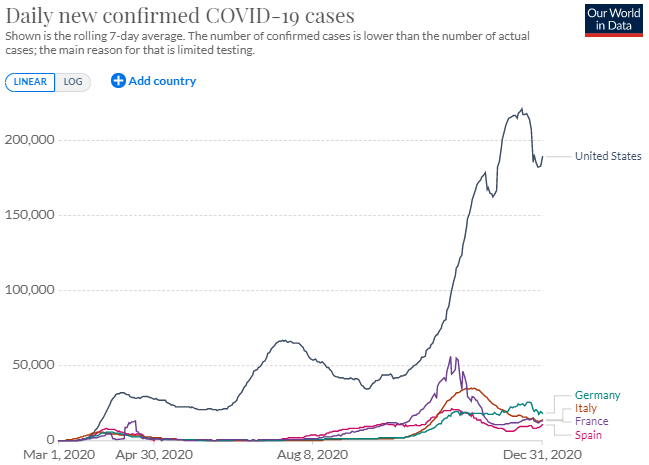

In Europe, there were mostly two COVID waves in 2020, roughly corresponding to the first and third waves in the USA. The overall tendency is that the waves in Europe were always shifted, happening **much earlier than those in the USA**. In general, at the very beginning, the virus was mostly spread in China, then in Europe, especially in Italy, and the situation in the USA didn't look so serious yet. Indeed, in Italy, the first serious outbreak was registered `2020-03-02`, i.e. almost three weeks earlier than in the USA, while the [first lockdown](https://en.wikipedia.org/wiki/COVID-19_lockdown_in_Italy) there happened on `2020-03-09`.

Another point to note is that in Europe, between both COVID waves in 2020, the situation always managed to improve significantly, reaching rather low numbers of confirmed daily cases (up to 200 cases per day). In the USA, instead, the coronavirus pandemic **never showed any real improvement** since its beginning. There were two plateaus, as we saw earlier, but both were stabilized at a very high average daily case number (more than 20,000 cases per day).

Finally, **the scale of daily new cases in the USA was always incomparably higher** (up to 9 times in the middle of December) than in the most suffered countries of Europe. Not Surprising that from the middle of May 2020, when both in Europe and the USA the situation reached a plateau (with very few daily cases in Europe and very high values in the USA), **the EUR-USD rate started constantly growing**, except for a short period from September till the beginning of November, corresponding mostly to a relative plateau (the second one) in the USA, still with high numbers of daily cases, and the beginning of the second wave in Europe. In that short period, the EUR-USD exchange rate was stabilized around the value of 1.18. After that, it started growing again.

It's difficult to estimate how the elections of Joe Biden as a new president of the USA `2020-11-03` and subsequent disorders from the opposition influenced the exchange rate. On one hand, a transition from the previous president to a new one is always an important political event having an impact on the overall economical situation in the country. In addition, we observe a curve bend on the EUR-USD exchange rate plot exactly at the point corresponding to the presidential elections. However, and we can confirm it from the graphs above, the main factor that led to new sharp growth of the exchange rate was a drastic increase of daily COVID cases in the USA. The numbers considerably exceeded those in Europe, and this third big wave of COVID in the USA lasted, with some fluctions, until the end of 2020 and continued in 2021 (from the image above we don't see it, but we can find more about from [Our world in data](https://ourworldindata.org/coronavirus/country/italy?country=USA~ITA~DEU~ESP~FRA)).

## EUR-RUB Exchange Rate Evolution

### General Trend

Now, let's switch to Russia and analyse the evolution of the EUR-RUB exchange rate. Again, we'll start with a general trend of the historical data.